In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:\M5_Projectupdated_ML\M5 Project solution\Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,NaN,47.5112,-122.257,1340.0,5650.0
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,NaN,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,NaN
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,NaN,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0


In [4]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

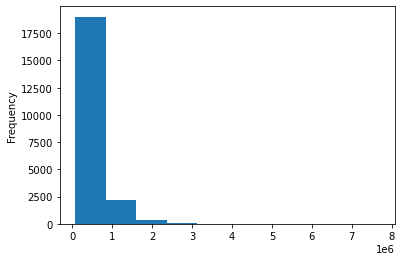

In [5]:
data['Sale Price'].plot.hist()

In [6]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
q1, q3

(321950.0, 645000.0)

In [7]:
iqr = q3 - q1
iqr

323050.0

In [8]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [9]:
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [10]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [11]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

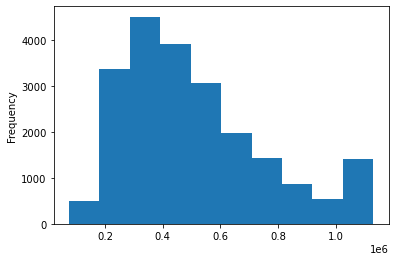

In [12]:
data['Sale Price'].plot.hist()

In [13]:
data.isnull().sum()

ID                                            0
Date House was Sold                           0
Sale Price                                    4
No of Bedrooms                                0
No of Bathrooms                               5
Flat Area (in Sqft)                          10
Lot Area (in Sqft)                           11
No of Floors                                  0
Waterfront View                               0
No of Times Visited                           0
Condition of the House                        2
Overall Grade                                 0
Area of the House from Basement (in Sqft)     4
Basement Area (in Sqft)                       0
Age of House (in Years)                       0
Renovated Year                                0
Zipcode                                       4
Latitude                                      1
Longitude                                     1
Living Area after Renovation (in Sqft)        1
Lot Area after Renovation (in Sqft)     

In [14]:
data['Sale Price'].dropna(inplace=True)
data["Sale Price"].isnull().sum()

4

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21608 non-null  float64
 5   Flat Area (in Sqft)                        21603 non-null  float64
 6   Lot Area (in Sqft)                         21602 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [16]:
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [19]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [20]:
data['Zipcode'].shape

(21613,)

In [21]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21613, 1)

In [22]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [24]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [25]:
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [26]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [27]:
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [28]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98103.0,47.5112,-122.257,1340.0,5650.0,No
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7619.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639.0,Yes
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,NaN,No
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0,No
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1560.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0,No


In [29]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [30]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [31]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98103.0,47.5112,-122.257,1340.0,5650.0,No,2017,0
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7619.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639.0,Yes,2017,26
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,NaN,No,2016,0
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000.0,No,2017,0
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503.0,No,2016,0


In [32]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [33]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98103.0,47.5112,-122.257,1340.0,5650.0,No,0
1,6414100192,538000.0,3,2.25,2570.0,7619.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639.0,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,NaN,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000.0,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1560.0,0,31,98074.0,47.6168,-122.045,1800.0,7503.0,No,0


In [34]:
data.drop( columns = 'ID', inplace = True)

In [35]:
data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

<AxesSubplot:xlabel='Condition of the House'>

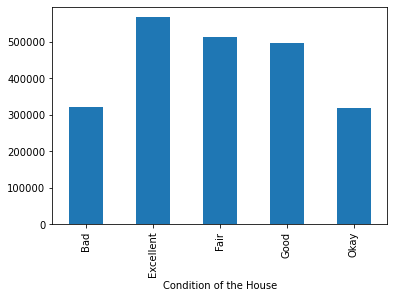

In [36]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Condition of the House'>

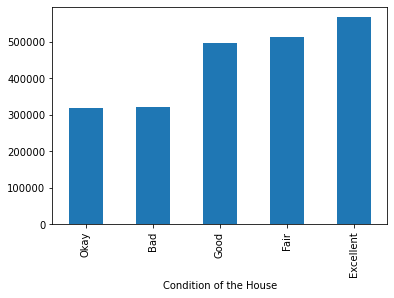

In [37]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

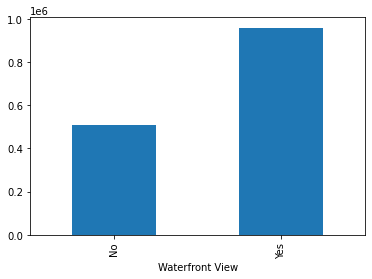

In [38]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Ever Renovated'>

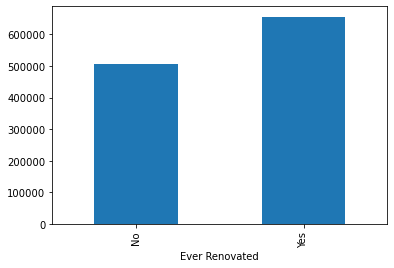

In [39]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Zipcode'>

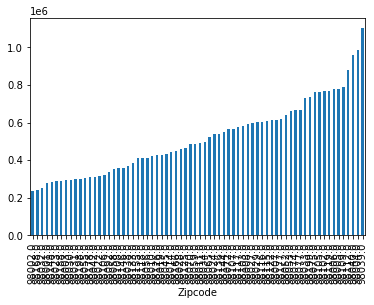

In [40]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [41]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

In [42]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [43]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [44]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

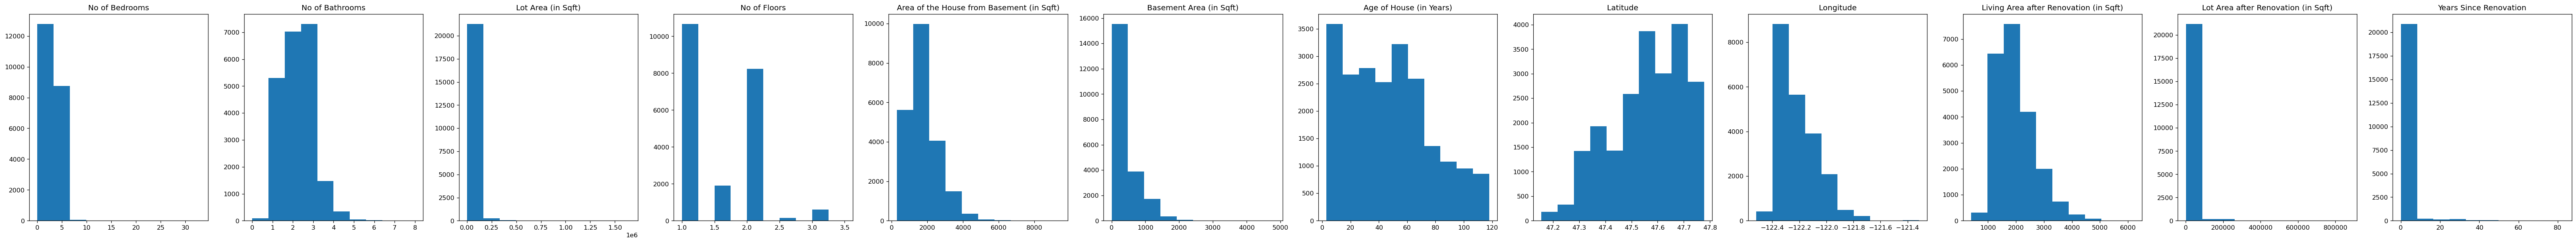

In [45]:
distribution(X, numerical_columns)

In [46]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']


In [47]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

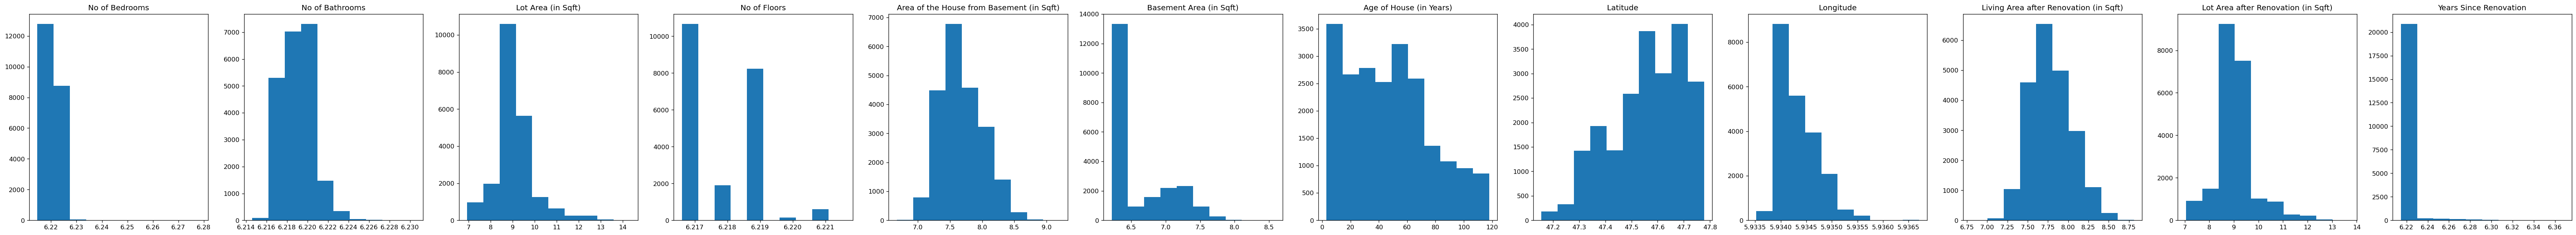

In [48]:
distribution(X, numerical_columns)

In [49]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,No,0,Fair,7,7.426549,6.214608,63,98103.0,47.5112,5.934214,7.517521,8.724207,No,6.214608
1,6.220590,6.219098,2570.0,9.001962,6.218600,No,0,Fair,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,Yes,6.265301
3,6.222576,6.220590,1960.0,8.612503,6.216606,No,0,Excellent,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,No,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,No,0,Fair,8,7.630461,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,No,6.214608
5,6.222576,6.223568,5420.0,11.536935,6.216606,No,0,Fair,10,8.387085,7.615791,17,98053.0,47.6561,5.934881,8.567886,11.536935,No,6.214608


In [50]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever Renovated'] = X['Ever Renovated'].map({
    'No':0,
    'Yes':1
    })

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,3,7,7.426549,6.214608,63,98103.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6.220590,6.219098,2570.0,9.001962,6.218600,0,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,3,8,7.630461,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608
5,6.222576,6.223568,5420.0,11.536935,6.216606,0,0,3,10,8.387085,7.615791,17,98053.0,47.6561,5.934881,8.567886,11.536935,0,6.214608


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398816,-1.449234,-0.980041,-0.412093,-0.915721,-0.087187,-0.305814,-0.629134,-0.564176,-0.767780,-0.726355,0.544866,0.468435,-0.352573,-0.306122,-1.027618,-0.416500,-0.210171,-0.168923
1,-0.398816,0.176341,0.533639,-0.083178,0.937055,-0.087187,-0.305814,-0.629134,-0.564176,0.641895,0.538379,0.681047,0.879658,1.161735,-0.746505,-0.356042,-0.048341,4.758041,4.826757
2,0.678220,1.149745,-0.130638,-0.544371,-0.915721,-0.087187,-0.305814,2.444137,-0.564176,-1.012842,1.504381,0.204413,1.085270,-0.283281,-1.272220,-0.985924,-0.563262,-0.210171,-0.168923
3,-0.398816,-0.148450,-0.435552,-0.017778,-0.915721,-0.087187,-0.305814,-0.629134,0.340431,-0.147319,-0.726355,-0.544583,-0.073632,0.409633,1.199161,-0.167038,-0.070480,-0.210171,-0.168923
4,0.678220,3.092206,3.637227,2.918715,-0.915721,-0.087187,-0.305814,-0.629134,2.149646,2.154921,2.288556,-1.021217,-0.466163,0.693295,1.483082,3.023240,3.278988,-0.210171,-0.168923


In [52]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.516569,0.577373,0.175452,0.175881,-0.006631,0.079610,0.028554,0.349841,0.509372,0.276774,-0.154473,-0.153171,-0.008748,0.129964,0.404867,0.154325,0.018525,-0.006761
No of Bathrooms,0.516569,1.000000,0.754305,0.104967,0.500933,0.063678,0.187479,-0.124802,0.635676,0.695968,0.253975,-0.506133,-0.204112,0.024553,0.223326,0.572399,0.095760,0.050211,0.004616
Flat Area (in Sqft),0.577373,0.754305,1.000000,0.341641,0.354138,0.103843,0.284475,-0.058861,0.705630,0.853666,0.373198,-0.318034,-0.199456,0.052606,0.240176,0.739619,0.318639,0.055096,0.024538
Lot Area (in Sqft),0.175452,0.104967,0.341641,1.000000,-0.218412,0.074315,0.121694,0.066129,0.165835,0.319757,0.056287,-0.006105,-0.279248,-0.145975,0.376101,0.361643,0.917836,0.022798,0.033046
No of Floors,0.175881,0.500933,0.354138,-0.218412,1.000000,0.023712,0.029466,-0.263654,0.461370,0.548358,-0.266670,-0.489173,-0.059282,0.049670,0.125703,0.277810,-0.210711,0.006291,-0.000400
Waterfront View,-0.006631,0.063678,0.103843,0.074315,0.023712,1.000000,0.401855,0.016656,0.070326,0.063287,0.063273,0.026163,0.030293,-0.014274,-0.041937,0.080576,0.083232,0.093288,0.105820
No of Times Visited,0.079610,0.187479,0.284475,0.121694,0.029466,0.401855,1.000000,0.045998,0.223637,0.161077,0.249438,0.053439,0.084853,0.006170,-0.078483,0.268534,0.118785,0.104043,0.094615
Condition of the House,0.028554,-0.124802,-0.058861,0.066129,-0.263654,0.016656,0.045998,1.000000,-0.143726,-0.153572,0.176053,0.361397,0.003143,-0.014940,-0.106532,-0.090067,0.073386,-0.060144,-0.012107
Overall Grade,0.349841,0.635676,0.705630,0.165835,0.461370,0.070326,0.223637,-0.143726,1.000000,0.723761,0.116002,-0.456639,-0.185919,0.111247,0.201764,0.676896,0.167575,0.009977,-0.023503
Area of the House from Basement (in Sqft),0.509372,0.695968,0.853666,0.319757,0.548358,0.063287,0.161077,-0.153572,0.723761,1.000000,-0.111353,-0.448593,-0.285317,-0.015163,0.360174,0.720885,0.301179,0.026039,0.013432


In [53]:
k=X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.736663
No of Bathrooms                               3.423493
Flat Area (in Sqft)                          21.475725
Lot Area (in Sqft)                            6.845166
No of Floors                                  2.388651
Waterfront View                               1.211048
No of Times Visited                           1.415440
Condition of the House                        1.260487
Overall Grade                                 2.905556
Area of the House from Basement (in Sqft)    23.260922
Basement Area (in Sqft)                       6.553152
Age of House (in Years)                       2.458031
Zipcode                                       1.668977
Latitude                                      1.191413
Longitude                                     1.880446
Living Area after Renovation (in Sqft)        2.918851
Lot Area after Renovation (in Sqft)           6.603291
Ever Renovated                                3.022736
Years Sinc

In [55]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [56]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398816,-1.449234,-0.915721,-0.087187,-0.305814,-0.629134,-0.564176,-0.726355,0.544866,0.468435,-0.352573,-0.306122,-1.027618,-0.416500,-0.210171,-0.168923
1,-0.398816,0.176341,0.937055,-0.087187,-0.305814,-0.629134,-0.564176,0.538379,0.681047,0.879658,1.161735,-0.746505,-0.356042,-0.048341,4.758041,4.826757
2,0.678220,1.149745,-0.915721,-0.087187,-0.305814,2.444137,-0.564176,1.504381,0.204413,1.085270,-0.283281,-1.272220,-0.985924,-0.563262,-0.210171,-0.168923
3,-0.398816,-0.148450,-0.915721,-0.087187,-0.305814,-0.629134,0.340431,-0.726355,-0.544583,-0.073632,0.409633,1.199161,-0.167038,-0.070480,-0.210171,-0.168923
4,0.678220,3.092206,-0.915721,-0.087187,-0.305814,-0.629134,2.149646,2.288556,-1.021217,-0.466163,0.693295,1.483082,3.023240,3.278988,-0.210171,-0.168923


In [57]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.498081
 No of Bathrooms                           2.949254
 No of Floors                              2.185096
 Waterfront View                           1.209175
 No of Times Visited                       1.410562
 Condition of the House                    1.253772
 Overall Grade                             2.541530
 Basement Area (in Sqft)                   1.639825
 Age of House (in Years)                   2.392178
 Zipcode                                   1.666161
 Latitude                                  1.183326
 Longitude                                 1.858114
 Living Area after Renovation (in Sqft)    2.504181
 Lot Area after Renovation (in Sqft)       1.552641
 Ever Renovated                            3.017575
 Years Since Renovation                    2.868473
 dtype: float64,
 16)

In [58]:
X = vif_data[:]

In [59]:
Y = data['Sale Price']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15124, 16), (6482, 16), (15124,), (6482,))

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [62]:
lr.coef_

array([  1545.72616375,  43281.52983013,  24040.15709956,   9198.94682027,
        31132.85550432,  15275.99902319, 108609.9314832 ,  12426.07999142,
        66981.51224797, -14113.7802573 ,  75430.40750707,  -5091.35834253,
        54397.15679695,   1681.69507513,  16000.51676824, -10940.6603594 ])

In [63]:
predictions = lr.predict(x_test)

In [64]:
lr.score(x_test, y_test)

0.7206645104506222

In [65]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [66]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

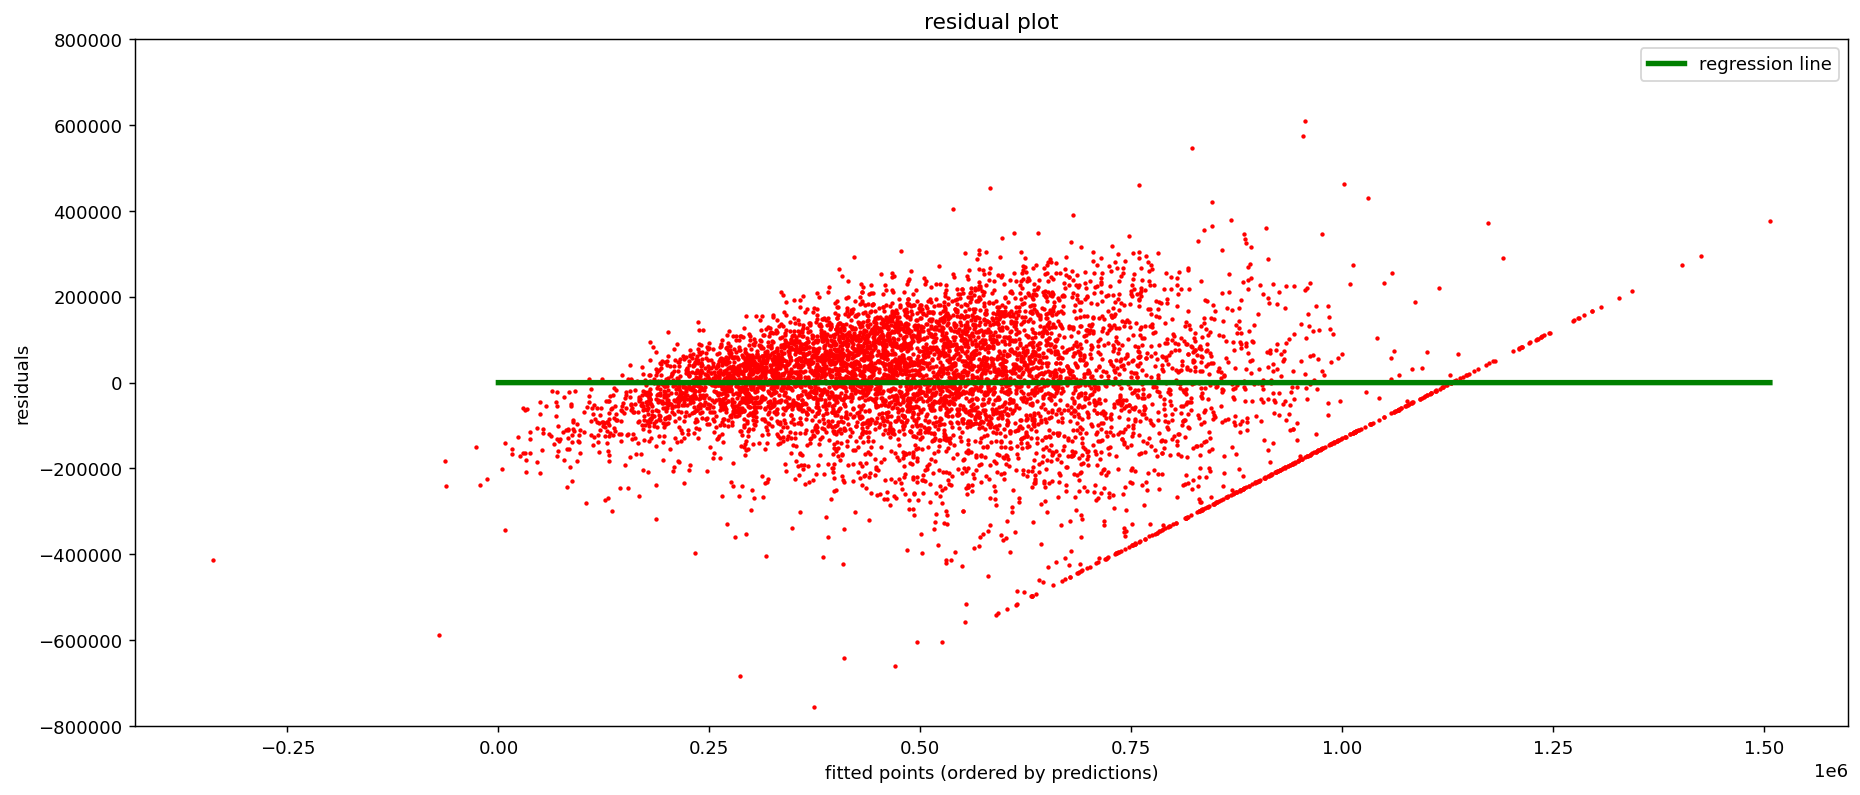

In [67]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

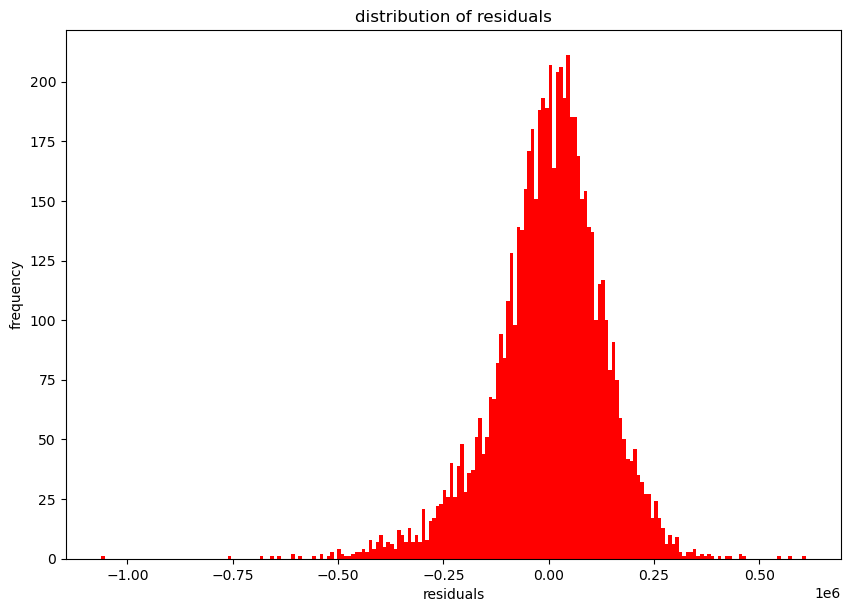

In [68]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [69]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


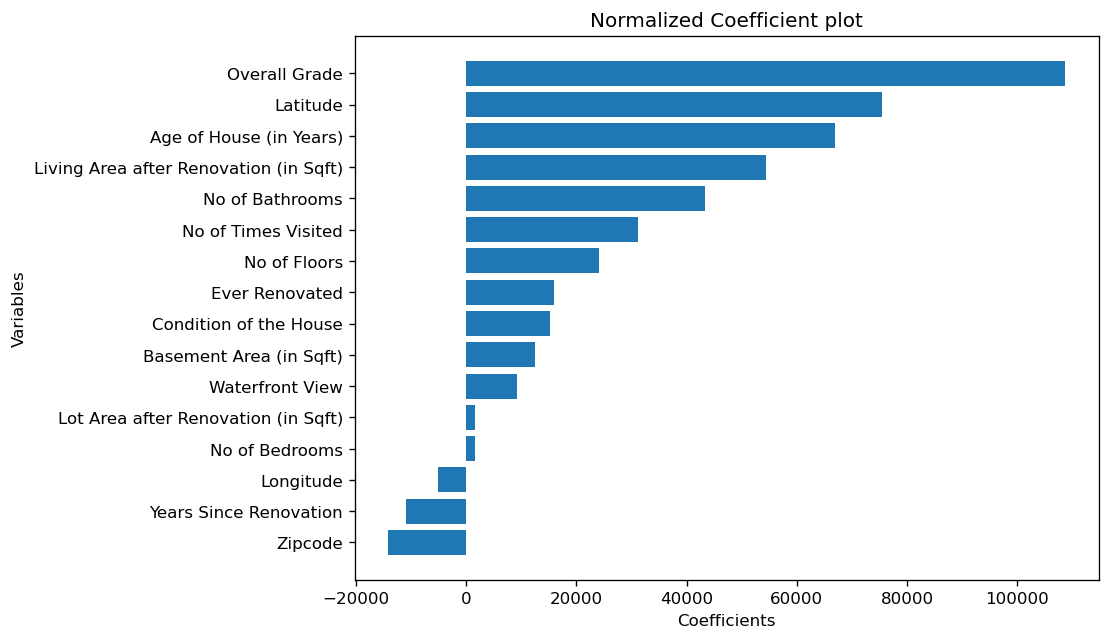

In [70]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()